***
# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 1</font>
***

## Trabajo de Análisis Descritivo de un Conjunto de Datos

Utilizando los conocimentos adquiridos en nuestro entrenamiento realice un análisis descriptivo básico del conjunto de datos central que utilizamos durante el curso. 

Vamos a construir histogramas, calcular y evaluar medidas de tendencia central, medidas de localización y de dispersión de los datos.

Sige el rutero propuesto y ve completando las células de código vacías. Intenta pensar en Más informaciones interesantes que pueden ser exploradas en nuestro dataset.

# <font color=green>1.1 Dataset del proyecto</font>
***

### Muestra de domicilios Colombia - 2018

Las investigaciones por muestras de domicilios realizadas anualmente, busca encontrar características generales de la población, de educación, trabajo, rendimiento y otras, de acuerdo con las necesidades de información del país, tales como las características de migración, fertilidad, casamientos, salud, nutrición, entre otros temas. Estas muestras al pasar de los años consistuyen una herramienta importante para la formulación, validación y evaluación de políticas dirigidas al desarrollo socioeconómico y la mejora de las condiciones de vida en Colombia.

### Datos

Los datos fueron creados  de manera didáctica para este curso.

### Variables utilizadas

> ### Ingreso 
> ***

Ingresos mensuales (en miles de pesos) del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del entrevistado en la fecha de referencia en años.

> ### Altura
> ***

Altura del entrevistado en metros.

> ### Ciudad
> ***

Código de referência a 27 ciudades analizadas. 


> ### Sexo	
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin estudios y menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No se sabe| 
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indio|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Moreno|
|9|Sin declarar|

#### Tratamiento a los datos
***

> Algunos de los tratamientos de datos más frecuentes son:
> 1. Eliminar las observaciones (líneas) con entradas de datos inválidos;
> 2. Eliminar observaciones donde hay datos perdidos (missing data);
> 3. Filtros própios de la investigación, por ejemplo: considerar solo las encuestas realizadas a la cabeza de familia (responsable por el domicilio).

***
***

### Utilice la célula abajo para importar las bibliotecas que necesite para ejecutar las tareas
#### <font color='red'>Sugerencias: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe el dataset y almacene el contenido en un DataFrame

In [ ]:
datos = pd.read_csv('datos.csv')

### Visualice el contenido del DataFrame

In [ ]:
datos.head()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para evaluar el comportamiento de la variable INGRESO vamos a construir una tabla de frecuencias considerando las siguintes clases según el salário mínimo (SM)
#### <font color='blue'>Descriva los puntos más relevantes que usted observe en la tabla y en el gráfico.</font>

Clases de ingreso:

<b>A</b> ► Más de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Hasta 2 SM

Para construir las clases de ingreso considere que el salário mínimo era de <b>$ 788,00</b> miles de pesos colombianos.

#### Siga los pasos abajo:

### 1º Definir los intevalos de las clases

In [ ]:
clases = [
    datos.Ingreso.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    datos.Ingreso.max()
]
clases

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir los labels de las clases

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir la columna de frecuencias

In [ ]:
frecuencia = pd.value_counts(
  pd.cut(x = datos.Ingreso,
         bins = clases,
         labels = labels,
         include_lowest = True)
)
frecuencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Ingreso, dtype: int64

### 4º Construir la columna de porcentajes

In [ ]:
porcentaje = pd.value_counts(
  pd.cut(x = datos.Ingreso,
         bins = clases,
         labels = labels,
         include_lowest = True),
  normalize = True
) * 100
porcentaje

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Ingreso, dtype: float64

### 5º Juntar las columnas de frecuencias y porcentajes y ordenar las líneas según los labels de las clases

In [ ]:
dist_frec_ingreso = pd.DataFrame(
    {'Frecuencia': frecuencia, 'Porcentaje (%)': porcentaje}
)
dist_frec_ingreso.sort_index(ascending = False)

,Frecuencia,Porcentaje (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construya um gráfico de barras para visualizar las informaciones de la tabla de frecuencias de arriba

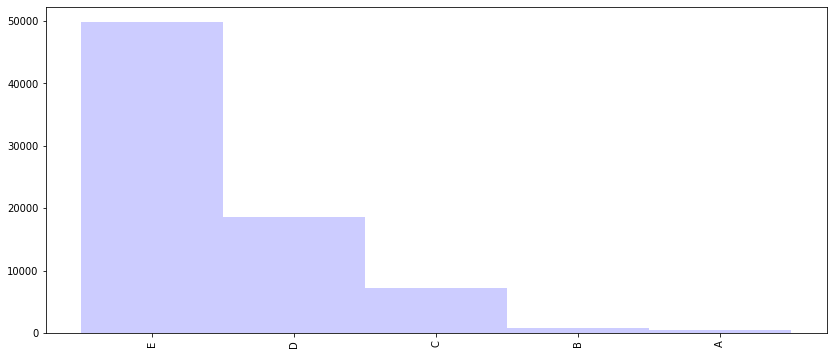

In [ ]:
dist_frec_ingreso['Frecuencia'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(14, 6))

> ### Conclusiones

Escriva sus conclusiones aquí...

### Cree um histograma para las variables QUANTITATIVAS de nuestro dataset
#### <font color='blue'>Descriva los puntos más relevantes que usted observa en los gráficos (assimetrías y sus tipos, posibles causas para determinados comportamientos etc.)</font>

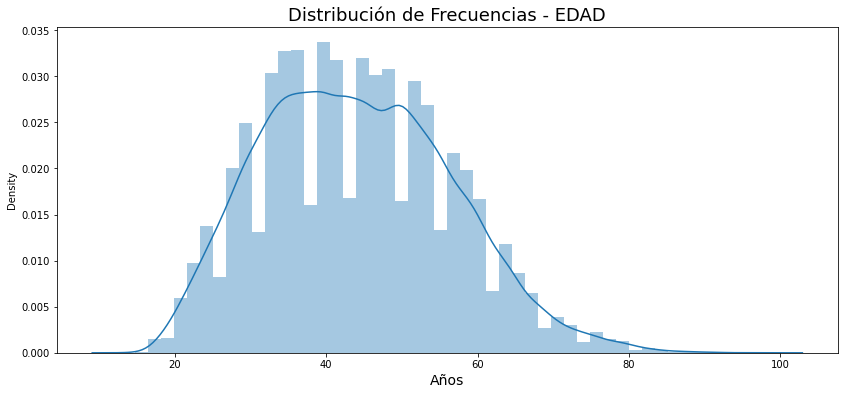

In [ ]:
ax = sns.distplot(datos['Edad'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de Frecuencias - EDAD', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax

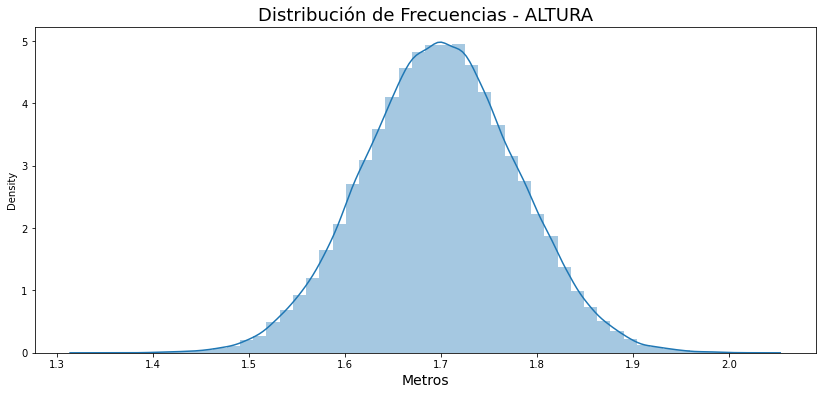

In [ ]:
ax = sns.distplot(datos['Altura'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de Frecuencias - ALTURA', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

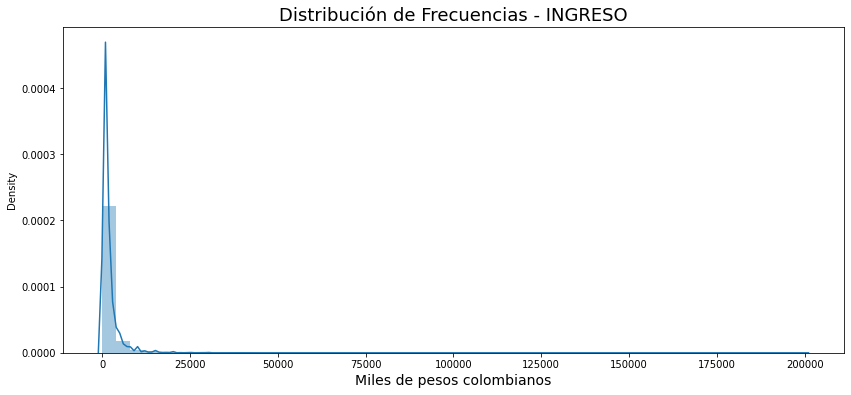

In [ ]:
ax = sns.distplot(datos['Ingreso'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de Frecuencias - INGRESO', fontsize=18)
ax.set_xlabel('Miles de pesos colombianos', fontsize=14)
ax

> ### Conclusiones

Escriva sus conclusioes aquí...

### Para la variable INGRESO, construya un histograma solamente con las informaciones de las personas con rendimento hasta $ 20.000,00 (miles de pesos).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


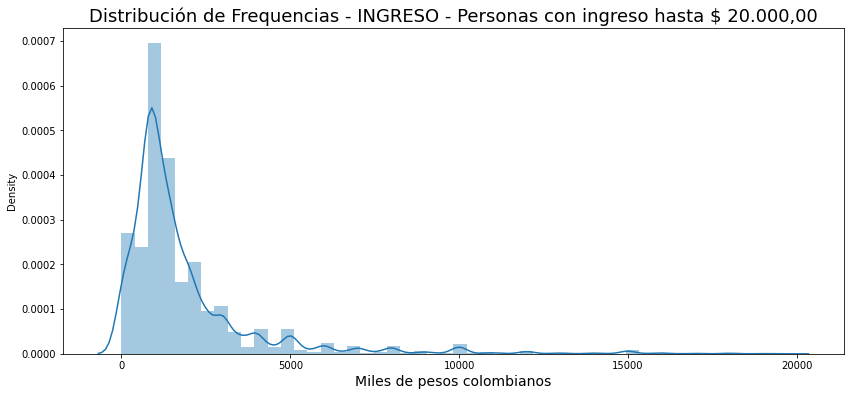

In [ ]:
ax = sns.distplot(datos.query('Ingreso < 20000')['Ingreso'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de Frecuencias - INGRESO - Personas con ingreso hasta $ 20.000,00', fontsize=18)
ax.set_xlabel('Miles de pesos colombianos', fontsize=14)
ax

### Construya una tabla de frecuencias y una con los porcentajes cruzando las variables SEXO y COLOR
#### <font color='blue'>Evalue el resultado de la tabla y escriva sus conclusiones principales</font>
#### <font color='red'>Utilize los diccionarios abajo para renombrar las líneas y columnas de las tablas de frecuencias y de los gráficos en nuestro proyecto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Femenino'
}
color = {0: 'Indio', 
         2: 'Blanco', 
         4: 'Negro', 
         6: 'Amarillo', 
         8: 'Pardo', 
         9: 'Sin declarar'}
anos_de_estudio = {
    1: 'Sin estudios y menos de 1 año', 
    2: '1 año', 
    3: '2 años', 
    4: '3 años', 
    5: '4 años', 
    6: '5 años', 
    7: '6 años', 
    8: '7 años', 
    9: '8 años', 
    10: '9 años', 
    11: '10 años', 
    12: '11 años', 
    13: '12 años', 
    14: '13 años', 
    15: '14 años', 
    16: '15 años ou más', 
    17: 'No se sabe'
}

In [ ]:
frecuencia = pd.crosstab(datos.Sexo,
                         datos.Color
                        )
frecuencia.rename(index = sexo, inplace = True)
frecuencia.rename(columns = color, inplace = True)
frecuencia

Color,Indio,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


In [ ]:
porcentaje = pd.crosstab(datos.Sexo,
                         datos.Color,
                         normalize = True
                        ) * 100
porcentaje.rename(index = sexo, inplace = True)
porcentaje.rename(columns = color, inplace = True)
porcentaje

Color,Indio,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Femenino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusiones

Escriva sus conclusiones aquí...

## Realize, para la variable INGRESO, un análisis descritivo con las herramientas que aprendimos en nuestro entrenamiento.

### Obtenga la media aritmética

In [ ]:
datos.Ingreso.mean()

2000.3831988547631

### Obtenga la mediana

In [ ]:
datos.Ingreso.median()

1200.0

### Obtenga la moda

In [ ]:
datos.Ingreso.mode()[0]

788

### Obtenga la desviación media absoluta

In [ ]:
datos.Ingreso.mad()

1526.4951371644931

### Obtenga la varianza

In [ ]:
datos.Ingreso.var()

11044906.00622118

### Obtenga la desviación estandar

In [ ]:
datos.Ingreso.std()

3323.3877303470294

### Obtenga la media, mediana y valor máximo de la variable INGRESO según el SEXO y el COLOR
#### <font color='blue'>Destaque los puntos más importantes que usted observa en las tabulaciones</font>
#### <font color='red'>El parámetro <i>aggfunc</i> de la función <i>crosstab()</i> puede recibir una lista de funciones. Ejemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
ingreso_estadisticas_por_sexo_y_color = pd.crosstab(datos.Color, 
                                                datos.Sexo, 
                                                values = datos.Ingreso, 
                                                aggfunc = {'mean', 'median', 'max'})
ingreso_estadisticas_por_sexo_y_color.rename(index = color, inplace = True)
ingreso_estadisticas_por_sexo_y_color.rename(columns = sexo, inplace = True)
ingreso_estadisticas_por_sexo_y_color

max                   mean                 median         
Sexo     Masculino  Femenino    Masculino     Femenino Masculino Femenino
Color                                                                    
Indio      10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Blanco    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Negro      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarillo   50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Pardo     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusiones

Escriva sus conclusiones aquí...

### Obtenga las medidas de dispersión de la variable INGRESO según el SEXO y el COLOR
#### <font color='blue'>Destaque los puntos más importantes que usted observa en las tabulaciones</font>
#### <font color='red'>O parámetro <i>aggfunc</i> de la función <i>crosstab()</i> puede reciber una lista de funciones. Ejemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
ingreso_dispersion_por_sexo_y_color = pd.crosstab(datos.Color, 
                                         datos.Sexo,
                                         aggfunc = {'mad', 'var', 'std'},
                                         values = datos.Ingreso).round(2)
ingreso_dispersion_por_sexo_y_color.rename(index = color, inplace = True)
ingreso_dispersion_por_sexo_y_color.rename(columns = sexo, inplace = True)
ingreso_dispersion_por_sexo_y_color

mad                std                    var              
Sexo     Masculino Femenino Masculino  Femenino    Masculino      Femenino
Color                                                                     
Indio       798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Blanco     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Negro       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarillo   3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Pardo      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusiones

Escriva sus conclusiones aquí...

### Construya um box plot de la variable INGRESO según SEXO y COLOR
#### <font color='blue'>¿Es posible verificar algún comportamiento diferenciado en el rendimiento entre los grupos de personas analizados? Evalue el gráfico y destaque los puntos más importantes.</font>
#### <font color='red'>1º - Utilice solamente las informaciones de personas con ingreso abajo de $ 10.000</font>
#### <font color='red'>2º - Para incluir una tercera variable en la construcción de un boxplot utilice el parámetro <i>hue</i> e indique la variable que quiere incluir en la subdivisión.</font>
#### Más informaciones: https://seaborn.pydata.org/generated/seaborn.boxplot.html

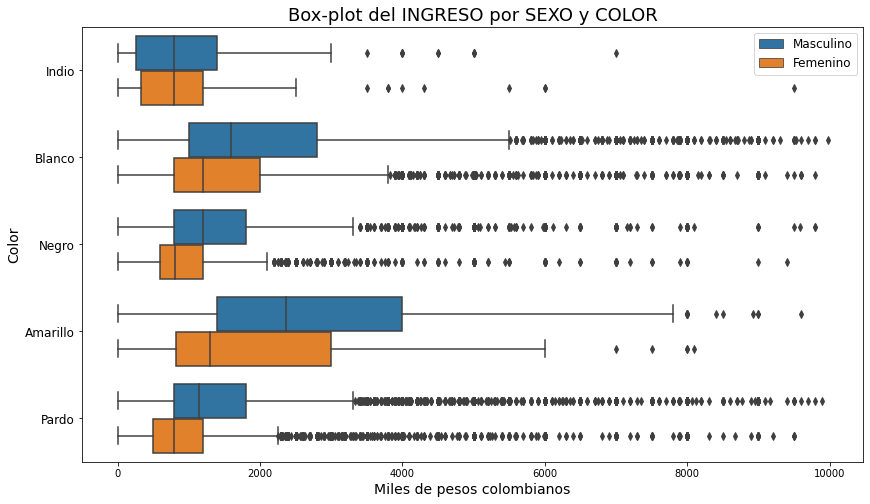

In [ ]:
ax = sns.boxplot(x = 'Ingreso', y = 'Color', hue = 'Sexo', data=datos.query('Ingreso < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando el tamaño de la figura

ax.set_title('Box-plot del INGRESO por SEXO y COLOR', fontsize=18)    # Configurando el título del gráfico

ax.set_xlabel('Miles de pesos colombianos', fontsize=14)    # Configurando el label del eje X

ax.set_ylabel('Color', fontsize=14)    # Configurando el label del eje Y
ax.set_yticklabels(['Indio', 'Blanco', 'Negro', 'Amarillo', 'Pardo', 'Sin declarar'], fontsize=12)    # Configurando el label de cada categoría del eje Y

# Configuraciones de la leyenda del gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Femenino'], fontsize=12)

ax

> ### Conclusiones

Escriva sus conclusiones aquí...

### ¿Cuál es el porcentaje de personas de nuestro <i>dataset</i> que ganan un salário mínimo ($ 788,00) o menos?
#### <font color='red'>Utilize la función <i>percentileofscore()</i> do <i>scipy</i> para realizar estos análisis.</font>
#### Más informaciones: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

porcentaje = stats.percentileofscore(datos.Ingreso, 788, kind = 'weak')
print("{0:.2f}%".format(porcentaje))

28.87%


### ¿Cuál es el valor máximo ganado por 99% de las personas de nuestro <i>dataset</i>?
#### <font color='red'>Utilice el método <i>quantile()</i> de <i>pandas</i> para realizar estos análisis.</font>

In [ ]:
valor = datos.Ingreso.quantile(.99)
print("$ {0:.2f}".format(valor))

$ 15000.00


### Obtenga la media, mediana, valor máximo y desviación estandar de la variable INGRESO según AÑOS DE ESTUDIO y SEXO
#### <font color='blue'>Destaque los puntos más importantes que usted observa en las Tabulaciones</font>
#### <font color='red'>O parámetro <i>aggfunc</i> de la función <i>crosstab()</i> puede recibir una lista de funciones. Ejemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
ingreso_estadisticas_por_sexo_y_estudo = pd.crosstab(datos['Años de Estudio'], 
                                         datos.Sexo,
                                         aggfunc = {'mean', 'median', 'max', 'std'},
                                         values = datos.Ingreso).round(2)
ingreso_estadisticas_por_sexo_y_estudo.rename(index = anos_de_estudio, inplace = True)
ingreso_estadisticas_por_sexo_y_estudo.rename(columns = sexo, inplace = True)
ingreso_estadisticas_por_sexo_y_estudo

max            ...       std         
Sexo                          Masculino  Femenino  ... Masculino Femenino
Años de Estudio                                    ...                   
Sin estudios y menos de 1 año   30000.0   10000.0  ...   1023.90   639.31
1 año                           30000.0    2000.0  ...   1331.95   425.29
2 años                          40000.0    4000.0  ...   1435.17   498.23
3 años                          80000.0    3500.0  ...   2143.80   424.12
4 años                          50000.0   10000.0  ...   1419.82   629.55
5 años                          35000.0    8000.0  ...   1484.65   635.78
6 años                          25000.0    6000.0  ...   1476.63   574.55
7 años                          40000.0    9000.0  ...   1419.71   602.04
8 años                          30000.0   18000.0  ...   1515.58   896.78
9 años                          60000.0   20000.0  ...   2137.66   973.22
10 años                         45000.0    6000.0  ...   2078.61   620.61
11 años                        200000.0  100000.0  ...   2676.54  1819.04
12 años                         30000.0  120000.0  ...   2268.08  4851.83
13 años                         25000.0   20000.0  ...   2797.12  2053.79
14 años                         50000.0   20000.0  ...   3987.21  2064.08
15 años ou más                 200000.0  100000.0  ...   7447.61  4212.77
No se sabe                       7000.0    3000.0  ...    979.65   459.99

[17 rows x 8 columns]

### Construya un box plot de la variable INGRESO según AÑOS DE ESTUDIO y SEXO
#### <font color='blue'>¿Es posible verificar algun comportamiento diferenciado en el rendimiento entre los grupos de personas analizadas? Evalue el gráfico y destaque los puntos más importantes.</font>
#### <font color='red'>1º - Utilice solamente las informaciones de personas com ingreso abajo de $ 10.000</font>
#### <font color='red'>2º - Utilice la variable EDAD para identificar si la desigualdad se verifica para personas de la mesma edad. Ejemplo: <i>data=datos.query('Ingreso < 10000 and Edad == 40')</i> ou <i>data=datos.query('Ingreso < 10000 and Edad == 50')</i></font>
#### <font color='red'>3º - Para incluir una tercera variable en la construcción de un boxplot utilice el parámetro <i>hue</i> e indique la variable que quiere incluir en la subdivisión.</font>
#### Más informaciones: https://seaborn.pydata.org/generated/seaborn.boxplot.html

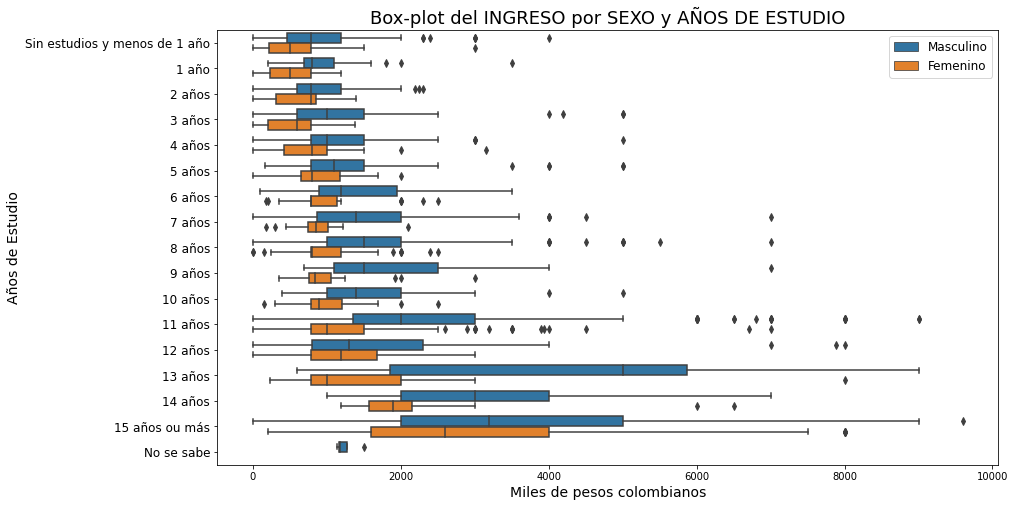

In [ ]:
ax = sns.boxplot(x = 'Ingreso', y = 'Años de Estudio', hue = 'Sexo', data=datos.query('Ingreso < 10000 and Edad == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando el tamaño de la figura

ax.set_title('Box-plot del INGRESO por SEXO y AÑOS DE ESTUDIO', fontsize=18)    # Configurando el título del gráfico

ax.set_xlabel('Miles de pesos colombianos', fontsize=14)    # Configurando el label del eje X

ax.set_ylabel('Años de Estudio', fontsize=14)    # Configurando el label del eje Y
ax.set_yticklabels([key for key in anos_de_estudio.values()], fontsize=12)    # Configurando el label de cada categoría del eje Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Femenino'], fontsize=12)

ax

> ### Conclusiones

Escriva sus conclusiones aquí...

### Obtenga la media, mediana, valor máximo y  desviación estandar de la variable INGRESO según las CIUDADES
#### <font color='blue'>Destaque los puntos más importantes que usted observa en las tabulaciones</font>
#### <font color='red'>Utilice el método <i>groupby()</i> de <i>pandas</i> conjuntamente com el método <i>agg()</i> para contruir la tabulación. El método <i>agg()</i> puede recibir un diccionario especificando cual columna del DataFrame deve ser utilizada y cual lista de funciones estadísticas queremos obtener, por ejemplo: <i>datos.groupby(['Ciudad']).agg({'Ingreso': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
ingreso_estadisticas_por_ciudad = datos.groupby(['Ciudad']).agg({'Ingreso': ['mean', 'median', 'max', 'std']})
ingreso_estadisticas_por_ciudad

Ingreso                            
               mean median     max          std
Ciudad                                         
11      1789.761223   1200   50000  2406.161161
12      1506.091782    900   30000  2276.233415
13      1445.130100    900   22000  1757.935591
14      1783.588889   1000   20000  2079.659238
15      1399.076871    850   50000  2053.779555
16      1861.353516   1200   15580  2020.688632
17      1771.094946   1000   60000  2934.590741
21      1019.432009    700   30000  1887.816905
22      1074.550784    750   40000  2373.355726
23      1255.403692    789   25000  1821.963536
24      1344.721480    800   15500  1651.805500
25      1293.370487    788   30000  1950.272431
26      1527.079319    900   50000  2389.622497
27      1144.552602    788   11000  1237.856197
28      1109.111111    788   16000  1478.997878
29      1429.645094    800  200000  3507.917248
31      2056.432084   1200  100000  3584.721547
32      2026.383852   1274  100000  3513.846868
33      2496.403168   1400  200000  5214.583518
35      2638.104986   1600   80000  3503.777366
41      2493.870753   1500  200000  4302.937995
42      2470.854945   1800   80000  3137.651112
43      2315.158336   1500   35000  2913.335783
50      2262.604167   1500   42000  3031.419122
51      2130.652778   1500   35000  2542.630178
52      1994.580794   1500   30000  2221.933065
53      4241.954722   2000  100000  5550.463338

### Construya un box plot de la variable INGRESO según las CIUDADES
#### <font color='blue'>¿Es posible verificar algun comportamiento diferenciado en el rendimiento entre los grupos analizados? Evalue el gráfico y destaque los puntos más importantes.</font>
#### <font color='red'>1º - Utilice solamente las informaciones de personas con ingreso abajo de $ 10.000</font>

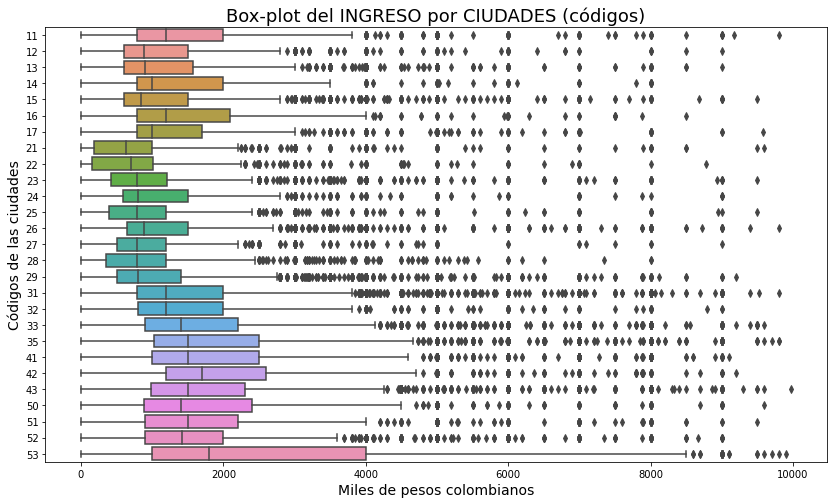

In [ ]:
ax = sns.boxplot(x = 'Ingreso', y = 'Ciudad', data=datos.query('Ingreso < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamaño de la figura

ax.set_title('Box-plot del INGRESO por CIUDADES (códigos)', fontsize=18)    # Configurando el título del gráfico

ax.set_xlabel('Miles de pesos colombianos', fontsize=14)    # Configurando el label del eje X

ax.set_ylabel('Códigos de las ciudades', fontsize=14)    # Configurando el label del eje Y
#ax.set_yticklabels([key for key in ciudad.values()], fontsize=12)    # Configurando el label de cada categoría del eje Y

ax

> ### Conclusiones

Escriva sus conclusiones aquí...